# Airline Customer Segmentation | Data Cleaning & Exploratory Data Analysis (EDA) | Fredrick Runie Taslim

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

The Airline Customer Segmentation clustering model will utilize the Airline Passangers Satisfaction dataset from Kaggle
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv

| Variable                               | Description                                                               |
|----------------------------------------|---------------------------------------------------------------------------|
| Gender                                 | Gender of the passengers (Female, Male)                                   |
| Customer Type                          | The customer type (Loyal customer, disloyal customer)                      |
| Age                                    | The actual age of the passengers                                          |
| Type of Travel                         | Purpose of the flight of the passengers (Personal Travel, Business Travel)|
| Class                                  | Travel class in the plane of the passengers (Business, Eco, Eco Plus)      |
| Flight Distance                       | The flight distance of this journey                                        |
| Inflight Wifi Service                  | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)     |
| Departure/Arrival Time Convenient      | Satisfaction level of Departure/Arrival time convenient                    |
| Ease of Online Booking                 | Satisfaction level of online booking                                       |
| Gate Location                          | Satisfaction level of Gate location                                        |
| Food and Drink                        | Satisfaction level of Food and drink                                       |
| Online Boarding                        | Satisfaction level of online boarding                                      |
| Seat Comfort                          | Satisfaction level of Seat comfort                                         |
| Inflight Entertainment                 | Satisfaction level of inflight entertainment                               |
| On-board Service                       | Satisfaction level of On-board service                                     |
| Leg Room Service                       | Satisfaction level of Leg room service                                     |
| Baggage Handling                       | Satisfaction level of baggage handling                                     |
| Check-in Service                       | Satisfaction level of Check-in service                                     |
| Inflight Service                       | Satisfaction level of inflight service                                     |
| Cleanliness                            | Satisfaction level of Cleanliness                                          |
| Departure Delay (Minutes)              | Minutes delayed when departure                                             |
| Arrival Delay (Minutes)                | Minutes delayed when Arrival                                               |
| Satisfaction                          | Airline satisfaction level(Satisfaction, neutral or dissatisfaction)       |


In [ ]:
train = pd.read_csv('/content/airline_satisfaction_train.csv')
test = pd.read_csv('/content/airline_satisfaction_test.csv')
df = pd.concat([train, test], axis=0)
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 non

In [ ]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Data Cleaning

In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [ ]:
df['Arrival Delay in Minutes'].median()


0.0

In [ ]:
# check skewness before perform imputation
arrival_delay_median = df["Arrival Delay in Minutes"].median()
print(f'Arrival Delay in Minutes column skewness: {df["Arrival Delay in Minutes"].skew()}\n')
print(f'Since the data is positively skewed, I am going to do median imputation for all the NaN values')
print(f'Arrival Delay in Minutes Median: {arrival_delay_median}')

Arrival Delay in Minutes column skewness: 6.670124610533306

Since the data is positively skewed, I am going to do median imputation for all the NaN values
Arrival Delay in Minutes Median: 0.0


In [ ]:
# perform median imputation
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(arrival_delay_median)
print(f'Arrival Delay in Minutes column NaN values: {df["Arrival Delay in Minutes"].isna().sum()}')

# transform dtype into integer
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

Arrival Delay in Minutes column NaN values: 0


## Exploratory Data Analysis (EDA)

In [ ]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())
    print('-'*50)

Gender
Female    65899
Male      63981
Name: count, dtype: int64
--------------------------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
--------------------------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
--------------------------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
--------------------------------------------------
satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64
--------------------------------------------------


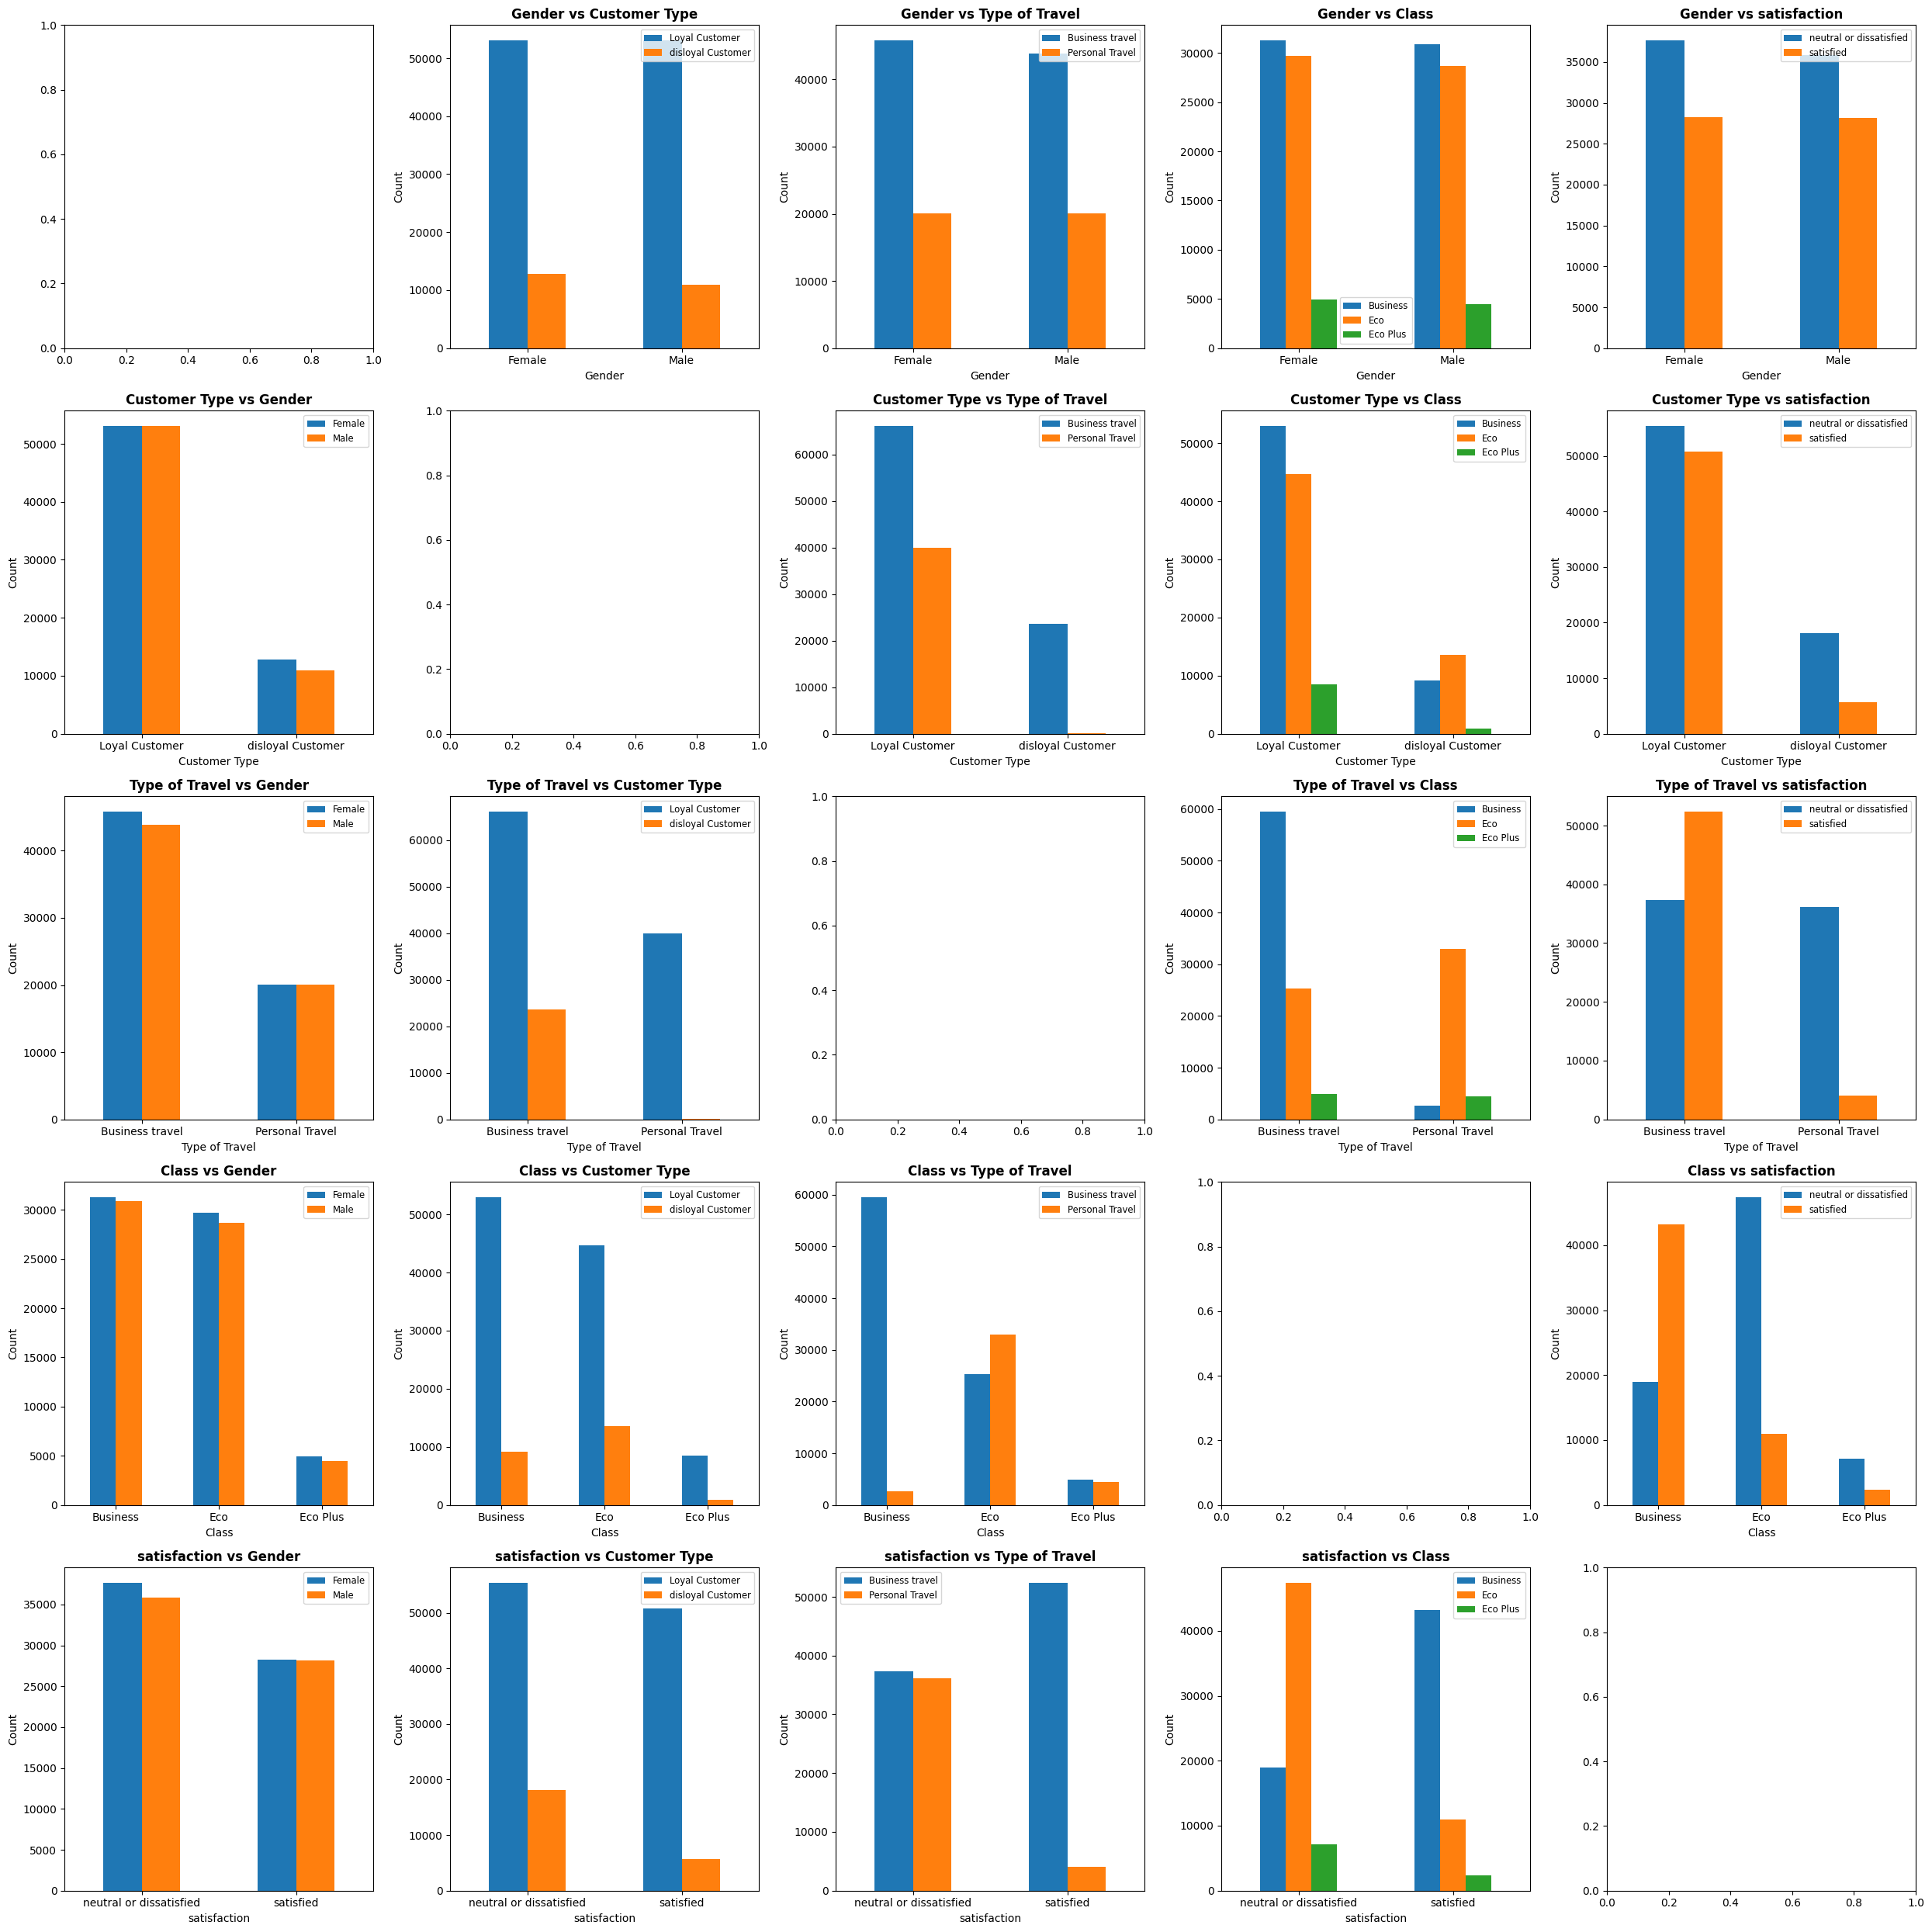

In [ ]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

fig, ax = plt.subplots(len(categorical_cols), len(categorical_cols), figsize=(25, 25))
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
      if i != j:  # Skip if i and j are the same
        df_grouped = df.groupby([col1, col2])[col1].count().reset_index(name='Count')
        pivot_df = df_grouped.pivot(index=col1, columns=col2, values='Count')
        pivot_df.plot(kind='bar', ax=ax[i, j])
        ax[i, j].set_title(f'{col1} vs {col2}', fontweight='bold')
        ax[i, j].set_xlabel(col1)
        ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation=0)  # Rotate x-axis labels
        ax[i, j].set_ylabel('Count')

        # Set legend
        ax[i, j].legend(fontsize='small')

plt.tight_layout()
plt.show()


**Based on the graphs above, we can conclude that:**
1. The data between males and females are pretty similar for each dependent variable. The majority of them flew for Business Travel, preferred to fly in Business Class and Economy respectively, and had neutral or dissatisfied feelings about their flight
2. The majority of both loyal dan disloyal customers flew for Business Travel. However, loyal customers usually flew in Business Class while disloyal customers flew in Economy. Interestingly, both categories had neutral or dissatisfied feelings about their flight.
3. People who travel for business are inclined to choose Business Class. On the other hand, Economy Class has become personal travelers' favorite. As expected, people who travel for business are more satisfied since most of them are traveling in Business Class.

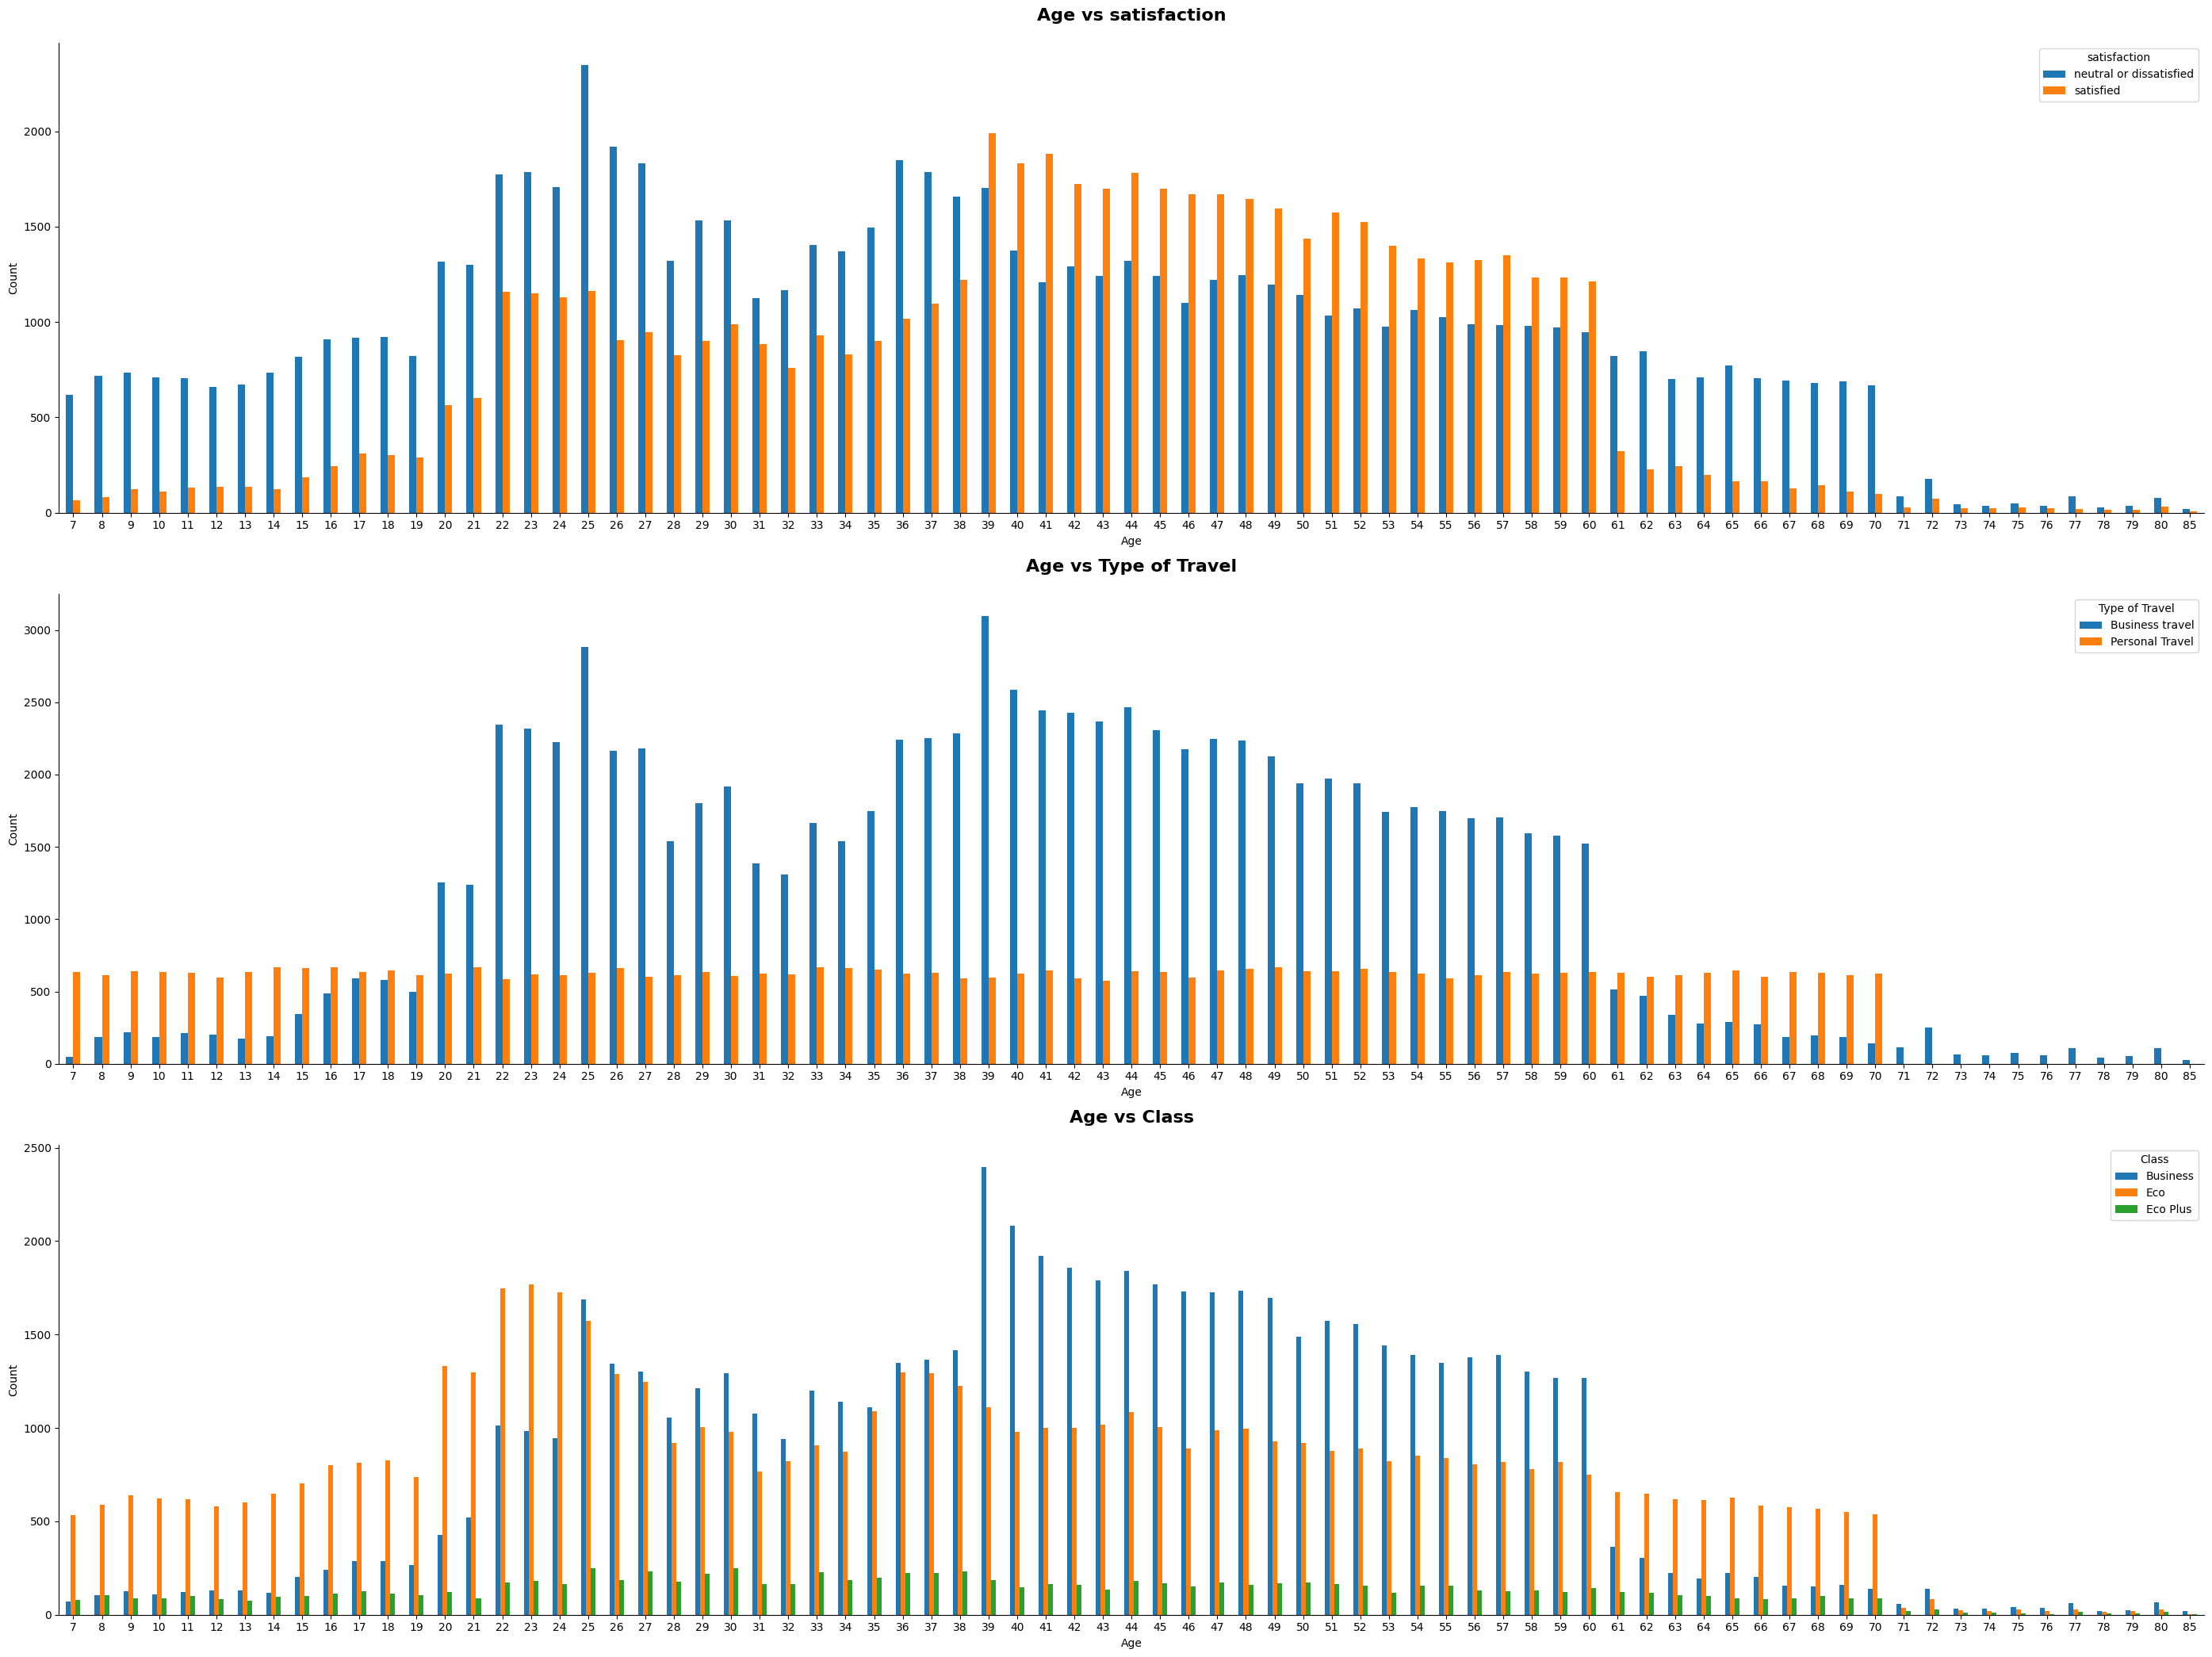

In [ ]:
columns = ['satisfaction', 'Type of Travel', 'Class']

fig, axes = plt.subplots(3, 1, figsize=(28, 21))

for i, col in enumerate(columns):
    age_group = df.groupby(['Age', col])[col].count().reset_index(name='Count')
    pivot_age = age_group.pivot(index='Age', columns=col, values='Count')

    pivot_age.plot(kind='bar', ax=axes[i])

    # Set title and ylabel for each subplot
    axes[i].set_title(f'Age vs {col}', pad=20, fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Count')

    # Convert x-labels to integers
    x_labels = [int(float(label.get_text())) for label in axes[i].get_xticklabels()]
    axes[i].set_xticklabels(x_labels, rotation=0)

    # Remove top and right spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**From the bar graphs above, we can tell that there are 3 groups that play a big role in this dataset:**
1. **Passengers who are 0-19 years old or over 60 years old:**

   This age group has the fewest number of flights. Most of them traveled for personal reasons, likely for vacation, and preferred to use Economy Class. This aligns with my previous findings, indicating that the majority of Economy Class passengers had neutral or dissatisfied feelings.
2. **Passengers who are 20-39 years old:**

   This age group has the highest number of flights. Most of them traveled for business, as they represent a productive demographic. Interestingly, the majority of them expressed neutral or dissatisfied feelings. I believe this might be because many passengers in this group are recent graduates or new professionals.
3. **Passengers who are 40-60 years old:**

   This age group ranks second in terms of the highest number of flights. Most of them traveled for business and preferred Business Class. This aligns with my previous findings, indicating that business travelers are inclined to fly in Business Class. I believe this is because passengers in this group typically hold more established careers and reputations, such as middle managers, top managers, or established entrepreneurs.

Therefore, I will focus on these three groups by transforming them into three categories.

In [ ]:
# categorize passangers by their age
df['Binned Age'] = pd.cut(x=df['Age'], bins=[0, 19, 39, 60, 100], labels=[1, 2, 3, 4])
df['Binned Age'] = np.where(df['Binned Age']==4, 1, df['Binned Age'])
df['Binned Age'].value_counts()

Binned Age
3    55763
2    51883
1    22234
Name: count, dtype: int64

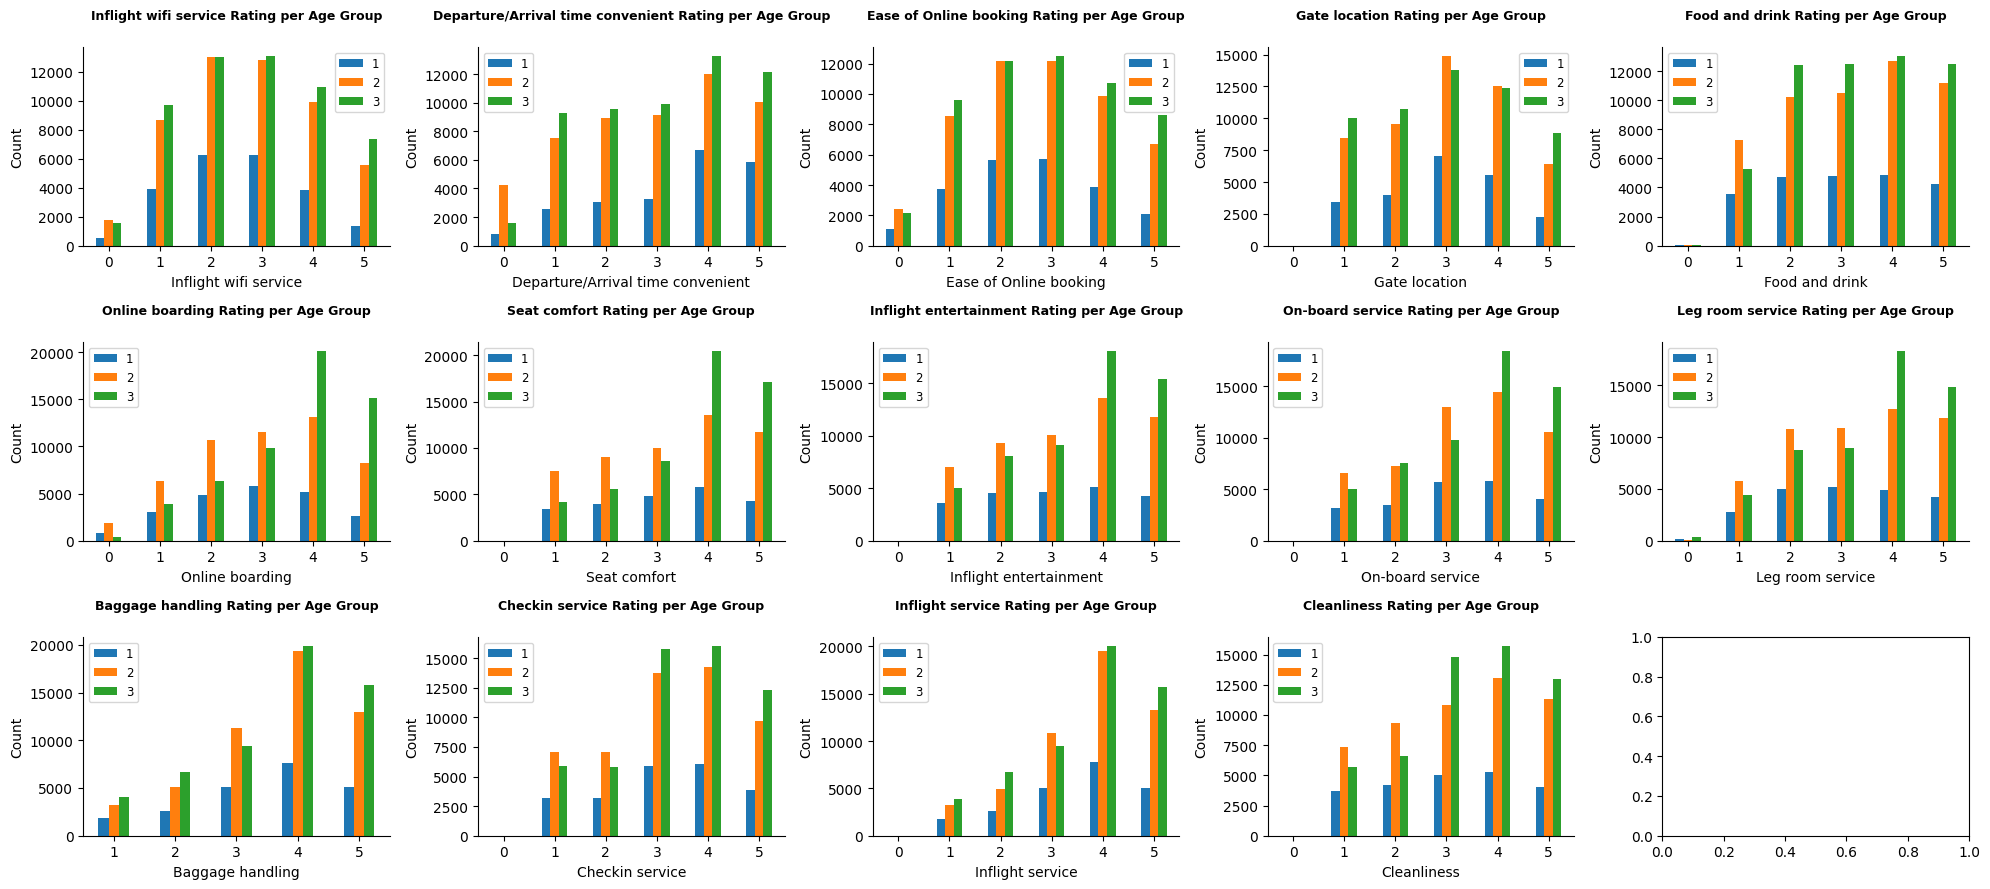

In [ ]:
rating_cols = ["Inflight wifi service",
              "Departure/Arrival time convenient",
              "Ease of Online booking",
              "Gate location",
              "Food and drink",
              "Online boarding",
              "Seat comfort",
              "Inflight entertainment",
              "On-board service",
              "Leg room service",
              "Baggage handling",
              "Checkin service",
              "Inflight service",
              "Cleanliness"]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 9))
axes = axes.flatten()  # Flatten the axes

# Loop over categorical columns and create countplots
for i, col in enumerate(rating_cols):
    ax = axes[i]
    rate_age_group = df.groupby([col,'Binned Age'])[col].value_counts().reset_index(name='Count')
    rate_age_pivot = rate_age_group.pivot(index=col, columns='Binned Age', values='Count')
    rate_age_pivot = rate_age_pivot.fillna(0)

    rate_age_pivot.plot(kind='bar', ax=ax)

    # Set title and ylabel for each subplot
    ax.set_title(f'{col} Rating per Age Group', pad=20, fontsize=9, fontweight='bold')
    ax.set_ylabel('Count')

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set legend
    ax.legend(fontsize='small')


plt.tight_layout()
plt.show()

Just by looking at the graphs above, I can confirm that someone who flew in Business Class is more satisfied. How is that?
- The graphs in the 2nd and 3rd row, especially regarding online boarding, seat comfort, inflight entertainment, on-board service, legroom service, check-in service, and cleanliness, show that passengers from the 3rd age category (40-60 y.o.) are more satisfied, notably since most of them traveled in Business Class.
- Other graphs show that some parameters do not really make a significant difference for each age category

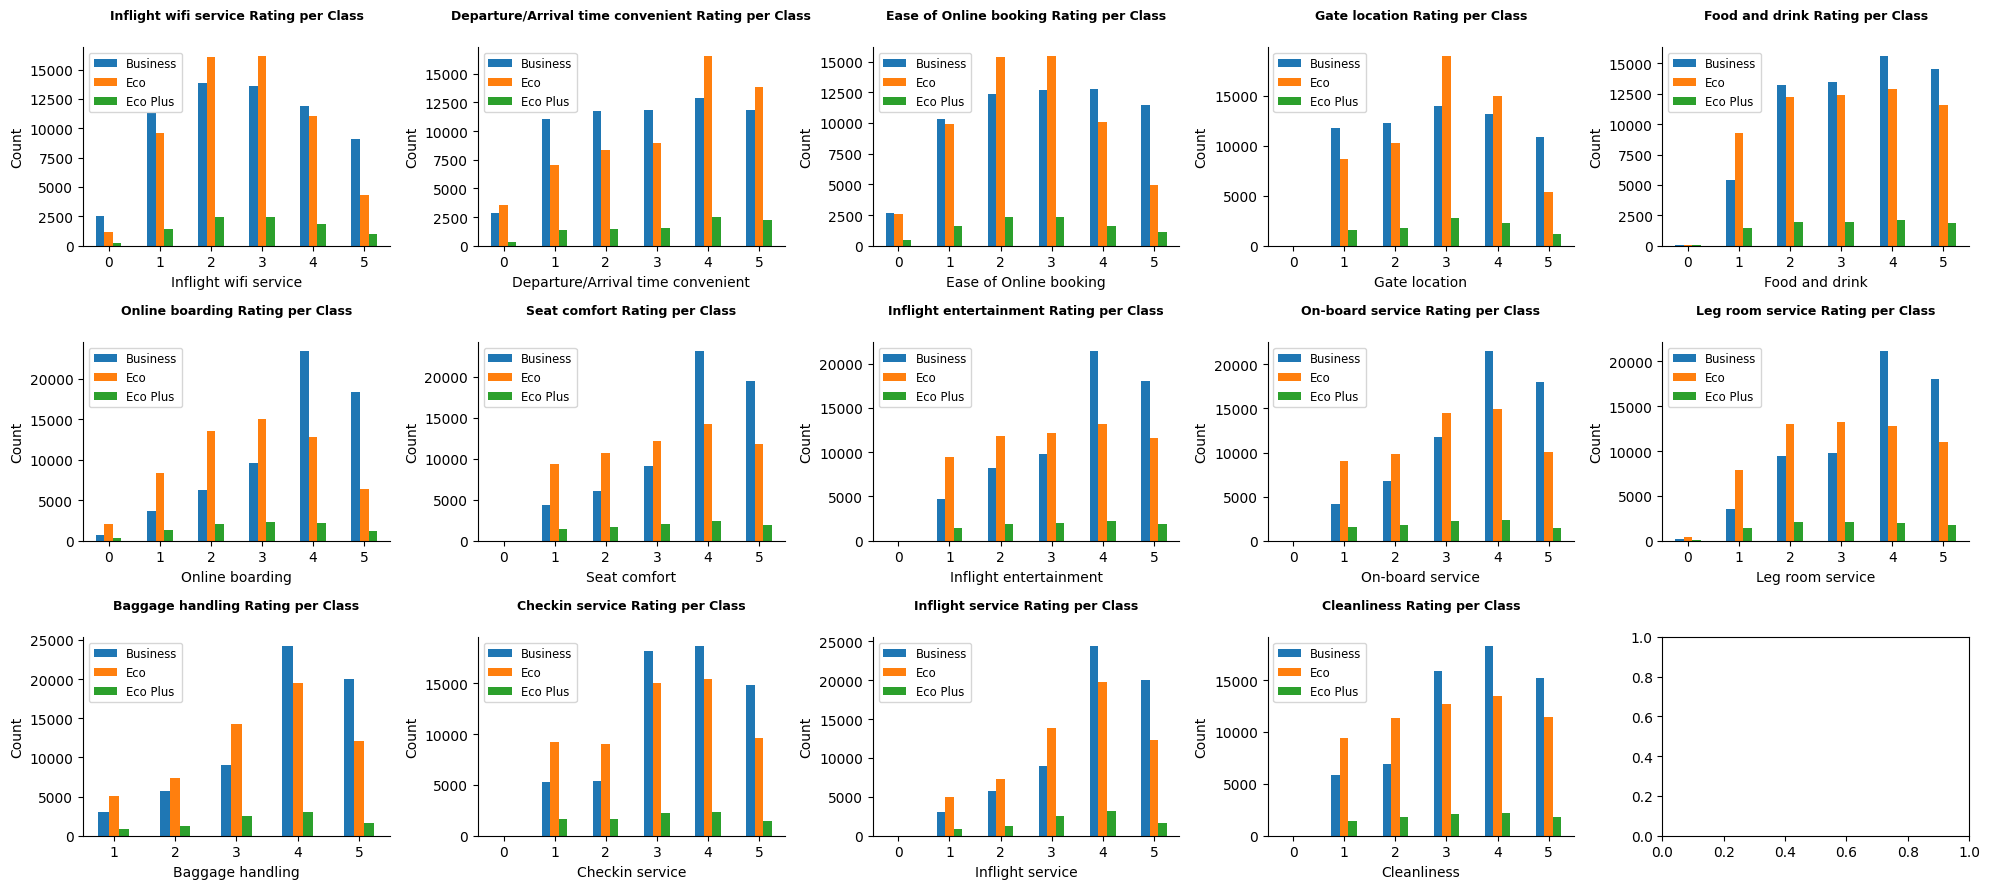

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 9))
axes = axes.flatten()  # Flatten the axes

# Loop over categorical columns and create countplots
for i, col in enumerate(rating_cols):
    ax = axes[i]
    rate_class_group = df.groupby([col,'Class'])[col].value_counts().reset_index(name='Count')
    rate_class_pivot = rate_class_group.pivot(index=col, columns='Class', values='Count')
    rate_class_pivot = rate_class_pivot.fillna(0)

    rate_class_pivot.plot(kind='bar', ax=ax)

    # Set title and ylabel for each subplot
    ax.set_title(f'{col} Rating per Class', pad=20, fontsize=9, fontweight='bold')
    ax.set_ylabel('Count')

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set legend
    ax.legend(fontsize='small')


plt.tight_layout()
plt.show()

The graphs above validate my findings from the previous one. As expected, Business Class flights are outperformed in almost all aspects. Interestingly, people who flew in Economy Class are more satisfied in terms of **departure/arrival time convenience.**

## Conclusion

From the information provided, several conclusions can be drawn:
1. **Gender Comparison**:
   - There is a similarity in preferences and satisfaction levels between males and females across various variables such as purpose of travel, class preference, and overall satisfaction with the flight experience.
2. **Loyalty Status Comparison**:
   - Both loyal and disloyal customers predominantly fly for business purposes, with loyal customers favoring Business Class and disloyal customers opting for Economy. Despite this, both groups generally express neutral or dissatisfied feelings about their flights.
3. **Age Group Analysis**:
   - Passengers aged 0-19 or over 60 tend to have fewer flights, mostly for personal reasons, and prefer Economy Class. They often express neutral or dissatisfied feelings, possibly due to vacation travel.
   - Passengers aged 20-39 represent the highest number of flights, mostly for business. However, despite their productivity, they often express neutral or dissatisfied feelings, possibly due to being recent graduates or new professionals.
   - Passengers aged 40-60, ranking second in flight frequency, mostly travel for business and prefer Business Class. This group generally expresses higher satisfaction levels, possibly due to their more established careers and reputations.
4. **Class Preference and Satisfaction**:
   - Passengers flying in Business Class tend to report higher satisfaction across various aspects of the flight experience, as evidenced by the graphs indicating higher satisfaction levels for parameters such as online boarding, seat comfort, inflight entertainment, on-board service, legroom service, check-in service, and cleanliness.
5. **Departure/Arrival Time Convenience**:
   - Interestingly, passengers flying in Economy Class express higher satisfaction regarding departure/arrival time convenience compared to those in Business Class, despite the latter generally reporting higher satisfaction levels across other aspects.
6. **Overall Conclusion**:
   - Business travelers, especially those aged 40-60, prefer and are more satisfied with Business Class flights. However, regardless of age or loyalty status, there seems to be a prevalent trend of neutral or dissatisfied feelings among passengers, particularly those traveling for business, suggesting areas for improvement in the flight experience.